# RELATÓRIO DE ANÁLISE — Adult Census Income Dataset (Kaggle)

Este notebook realiza uma análise exploratória completa do dataset Adult Census Income.

Esses dados foram extraídos do banco de dados do Censo de 1994 realizado nos Estados Unidos.

A tarefa de predição é determinar se uma pessoa ganha mais de US$ 50.000 por ano.

Tipo de Atividade: Classificatória
Target: "income" (renda)

| Feature            | Descrição                                                                                 |
| ------------------ | ----------------------------------------------------------------------------------------- |
| **age**            | Idade do indivíduo (em anos).                                                             |
| **workclass**      | Tipo de vínculo empregatício (ex.: Private, Federal-gov).                                 |
| **fnlwgt**         | Peso amostral do censo (*final weight*), indicando quantas pessoas o registro representa. |
| **education**      | Nível de escolaridade concluído.                                                          |
| **education.num**  | Escolaridade convertida para um valor numérico.                                           |
| **marital.status** | Estado civil do indivíduo (ex.: Married-civ-spouse, Divorced).                            |
| **occupation**     | Profissão exercida pelo indivíduo.                                                        |
| **relationship**   | Relação familiar na residência (ex.: Husband, Not-in-family).                             |
| **race**           | Raça/etnia declarada.                                                                     |
| **sex**            | Sexo informado.                                                                           |
| **capital.gain**   | Ganho anual de capital (ex.: investimentos).                                              |
| **capital.loss**   | Perda anual de capital.                                                                   |
| **hours.per.week** | Número de horas trabalhadas por semana.                                                   |
| **native.country** | País de origem do indivíduo.                                                              |
| **income**         | Target: indica se a renda anual é `<=50K` ou `>50K`.                                      |


### Feature: `fnlwgt`

O atributo vem do banco de dados do Censo dos EUA de 1994, usado neste Dataset Adult Income Dataset (também chamado de Census Income Dataset).

Função:
    Cada pessoa registrada no dataset não corresponde apenas a si mesma, mas a um número maior de pessoas com características semelhantes na população.
    O fnlwgt é esse número — o peso que o censo atribuiu para garantir que a amostra seja representativa da população.

Exemplo prático:

    Se um indivíduo tem fnlwgt = 200000, significa que, estatisticamente, ele representa cerca de 200 mil pessoas com perfil semelhante (idade, escolaridade, ocupação etc.).

Em suma:
- Representa o **peso amostral** atribuído pelo censo a cada registro.  
- Indica **quantas pessoas na população real (EUA) possuem características semelhantes** ao indivíduo da amostra.  
- Serve para análises estatísticas representativas da população.  
- Em tarefas de *machine learning*, geralmente é **descartado no treinamento**, pois não descreve diretamente o indivíduo.


#### Importação das Bibliotecas

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("adult_census_income.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Total de Registros: 32.561

Estrutura:

| #  | Column          | Non-Null Count | Dtype  |
|----|-----------------|----------------|--------|
| 0  | age             | 32561 non-null | int64  |
| 1  | workclass       | 32561 non-null | object |
| 2  | education       | 32561 non-null | object |
| 3  | education.num   | 32561 non-null | int64  |
| 4  | marital.status  | 32561 non-null | object |
| 5  | occupation      | 32561 non-null | object |
| 6  | relationship    | 32561 non-null | object |
| 7  | race            | 32561 non-null | object |
| 8  | sex             | 32561 non-null | object |
| 9  | capital.gain    | 32561 non-null | int64  |
| 10 | capital.loss    | 32561 non-null | int64  |
| 11 | hours.per.week  | 32561 non-null | int64  |
| 12 | native.country  | 32561 non-null | object |
| 13 | income          | 32561 non-null | object |


#### Tratamento de Valores Nulos

Há campos de texto com valores <b>"?"</b> que devem ser tratados como <b>Nulos</b>. Neste caso, precisamos substituir todos  eles por <i>Null</i>

In [26]:
df = df.replace("?", np.nan)

Visualização dos dados tratados:

In [27]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Verificando se há valores nulos que precisam ser tratados

In [28]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Notamos que as features <b>workclass</b>, <b>occupation</b> e <b>native.country</b> contém valores nulos. Tratamentos:
 - <i>workclass</i>: é o tipo de contrato de tabalho, vamos substituir nulos por "outros";
 - <i>occupation</i>: é o cargo exercido. Como pode ser que a pessoa não esteja trabalhando, vamos também substituir por "outros";
 - <i>native.country</i>: país de origem da pessoa. Podemos deixar como "outros" mas, levando em consideração que <b>United-States</b> representa mais de 90%, podemos substituir por "United-States"

In [29]:
df['native.country'].value_counts(normalize=True)

United-States                 0.912190
Mexico                        0.020108
Philippines                   0.006192
Germany                       0.004284
Canada                        0.003784
Puerto-Rico                   0.003565
El-Salvador                   0.003315
India                         0.003127
Cuba                          0.002971
England                       0.002814
Jamaica                       0.002533
South                         0.002502
China                         0.002345
Italy                         0.002283
Dominican-Republic            0.002189
Vietnam                       0.002095
Guatemala                     0.002001
Japan                         0.001939
Poland                        0.001876
Columbia                      0.001845
Taiwan                        0.001595
Haiti                         0.001376
Iran                          0.001345
Portugal                      0.001157
Nicaragua                     0.001063
Peru                     

In [30]:
df['workclass'] = df['workclass'].fillna('other')
df['occupation'] = df['occupation'].fillna('other')
df['native.country'] = df['native.country'].fillna('United-States')
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Vamos agora remover a feature <b>fnlwgt</b> por não ser relevante para o projeto. Conforme vimos no início, trata-se de uma variável estatística inserida pelo Censu de modo a refletir as características da população real.

In [31]:
df = df.drop('fnlwgt', axis=1)
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,other,HS-grad,9,Widowed,other,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,other,Some-college,10,Widowed,other,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Vamos agora verificar se a feature <b>age (idade)</b> possui algum valor anormal:

In [32]:
print("Idade mínima:", df["age"].min())
print("Idade máxima:", df["age"].max())

Idade mínima: 17
Idade máxima: 90


### 2. Análise Exploratória

Descrição Estatística (apenas colunas numéricas)

In [33]:
colunas_numericas = ["age", "capital.gain", "capital.loss", "hours.per.week"]
df[colunas_numericas].describe()

,age,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Percentual de Distribuição de Renda:


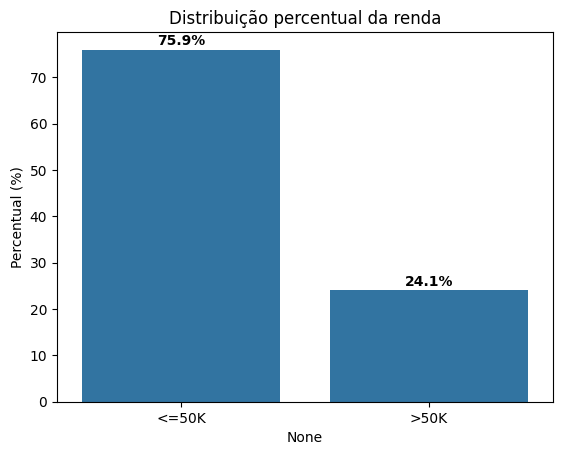

In [34]:
# Calcular percentuais
contagem_renda = df['income'].value_counts(normalize=True) * 100

# Criar gráfico
ax = sns.barplot(x=contagem_renda.index, y=contagem_renda.values)

# Adicionar rótulos de percentual em cada barra
for i, v in enumerate(contagem_renda.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.ylabel("Percentual (%)")
plt.title("Distribuição percentual da renda")
plt.show()

Distribuição da Idade:

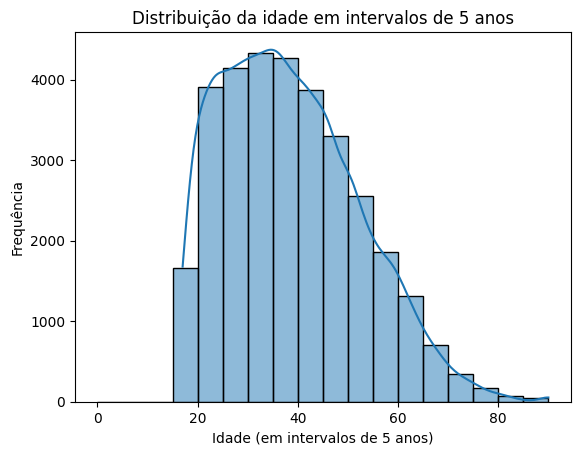

In [35]:
# Criar bins de 5 em 5 anos (ex.: de 0 até 100)
bins = np.arange(0, df['age'].max() + 5, 5)

# Histograma com intervalos de 5 anos
sns.histplot(df['age'], bins=bins, kde=True)
plt.xlabel("Idade (em intervalos de 5 anos)")
plt.ylabel("Frequência")
plt.title("Distribuição da idade em intervalos de 5 anos")
plt.show()

Analise Boxplot das features numéricas

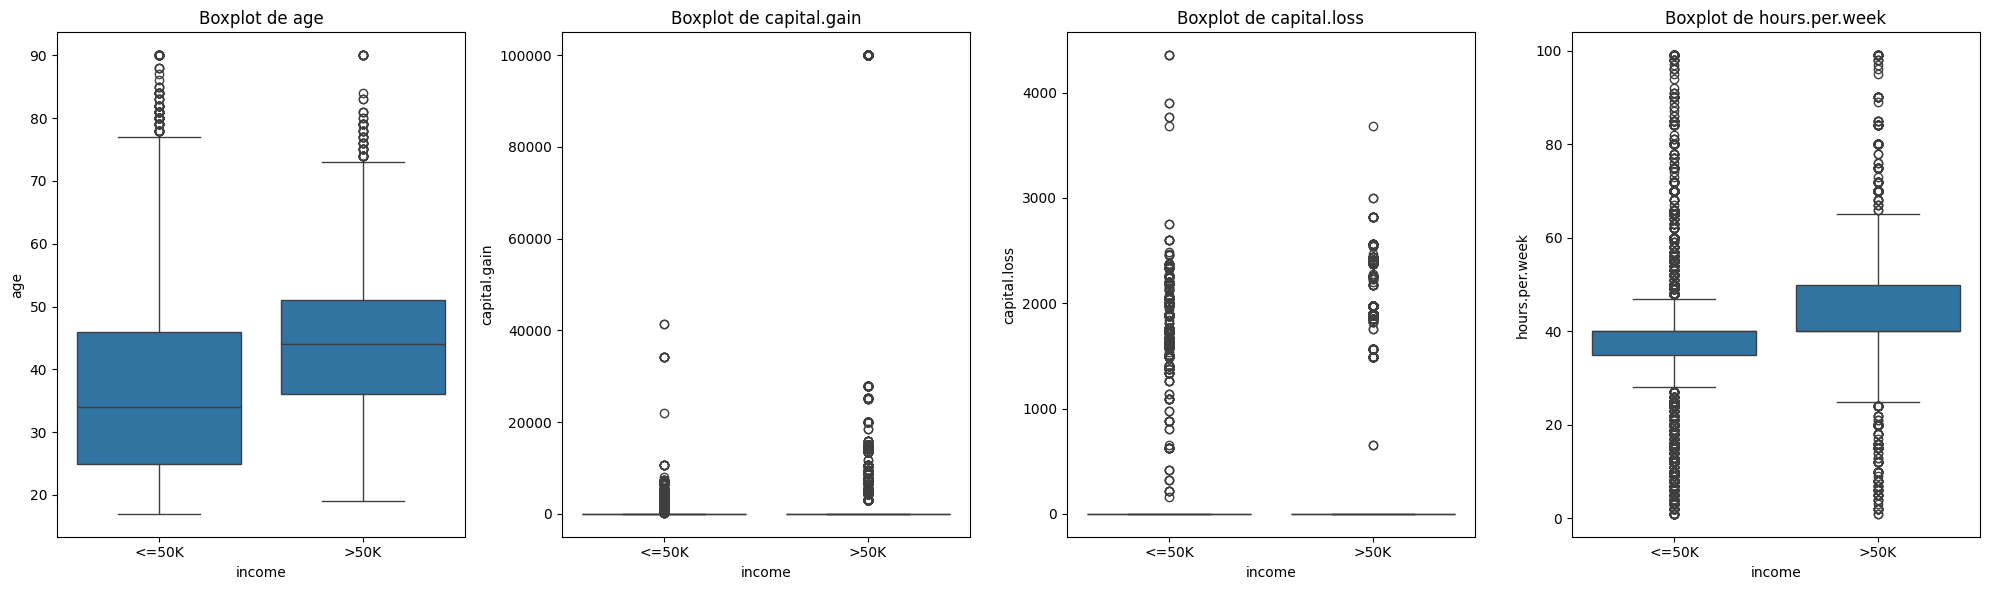

In [36]:
# Selecionar colunas numéricas
colunas_numericas = ["age", "capital.gain", "capital.loss", "hours.per.week"]

# Criar subplots lado a lado
fig, axes = plt.subplots(1, len(colunas_numericas), figsize=(20, 6))

for i, col in enumerate(colunas_numericas):
    sns.boxplot(x="income", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

Correlação e Heatmap

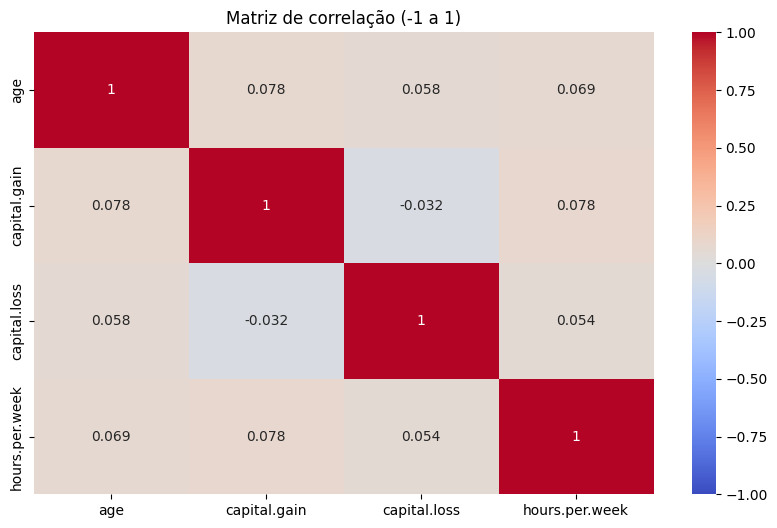

In [37]:
# Selecionar colunas numéricas
colunas_numericas = ["age", "capital.gain", "capital.loss", "hours.per.week"]
df_num = df[colunas_numericas]

# Matriz de correlação (-1 a 1)
corr = df_num.corr()

# Plotar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Matriz de correlação (-1 a 1)")
plt.show()

### 3. Tratamento, Conversão e Criação de Features

#### Convertendo Classificação Textual para Numérica

A feature <b>education</b> é categórica e no dataset ela vem tanto em formato object quanto em int64 (<b>education.num</b>), ambas trazendo a mesma informação em formatos diferentes.
Podemos fazer o mesmo com as demais colunas textuais categóricas.
Existe uma biblioteca que faz isso de forma automática chamada <b>LabelEncoder</b>.

O mapeamento do LabelEncoder não muda aleatoriamente a cada execução. Ele segue uma regra fixa:

    - As classes são ordenadas em ordem alfabética (lexicográfica).

    - Cada categoria recebe um número inteiro começando em 0.

Preferimos fazer este processo de forma manual, assim garantimos mais transparencia e facilita nossa visualização e futuras consultas. Caso haja nova categoria, basta acrescentar no mapeamento abaixo.

In [38]:
# Definir mapeamentos fixos
mappings = {
    "workclass": {
        "Federal-gov": 0, "Local-gov": 1, "Never-worked": 2, "Private": 3,
        "Self-emp-inc": 4, "Self-emp-not-inc": 5, "State-gov": 6,
        "Without-pay": 7, "other": 8
    },
    "marital.status": {
        "Divorced": 0, "Married-AF-spouse": 1, "Married-civ-spouse": 2,
        "Married-spouse-absent": 3, "Never-married": 4,
        "Separated": 5, "Widowed": 6
    },
    "occupation": {
        "Adm-clerical": 0, "Armed-Forces": 1, "Craft-repair": 2,
        "Exec-managerial": 3, "Farming-fishing": 4, "Handlers-cleaners": 5,
        "Machine-op-inspct": 6, "Other-service": 7, "Priv-house-serv": 8,
        "Prof-specialty": 9, "Protective-serv": 10, "Sales": 11,
        "Tech-support": 12, "Transport-moving": 13, "other": 14
    },
    "relationship": {
        "Husband": 0, "Not-in-family": 1, "Other-relative": 2,
        "Own-child": 3, "Unmarried": 4, "Wife": 5
    },
    "race": {
        "Amer-Indian-Eskimo": 0, "Asian-Pac-Islander": 1,
        "Black": 2, "Other": 3, "White": 4
    },
    "sex": {
        "Female": 0, "Male": 1
    },
    "native.country": {
        "Cambodia": 0, "Canada": 1, "China": 2, "Columbia": 3, "Cuba": 4,
        "Dominican-Republic": 5, "Ecuador": 6, "El-Salvador": 7, "England": 8,
        "France": 9, "Germany": 10, "Greece": 11, "Guatemala": 12, "Haiti": 13,
        "Holand-Netherlands": 14, "Honduras": 15, "Hong": 16, "Hungary": 17,
        "India": 18, "Iran": 19, "Ireland": 20, "Italy": 21, "Jamaica": 22,
        "Japan": 23, "Laos": 24, "Mexico": 25, "Nicaragua": 26,
        "Outlying-US(Guam-USVI-etc)": 27, "Peru": 28, "Philippines": 29,
        "Poland": 30, "Portugal": 31, "Puerto-Rico": 32, "Scotland": 33,
        "South": 34, "Taiwan": 35, "Thailand": 36, "Trinadad&Tobago": 37,
        "United-States": 38, "Vietnam": 39, "Yugoslavia": 40, "other": 41
    },
    "income": {
        "<=50K": 0, ">50K": 1
    }
}

# Função para aplicar os mapeamentos
def apply_mappings(df, mappings):
    for col, mapping in mappings.items():
        df[col + ".num"] = df[col].map(mapping)
    return df

# Exemplo de uso
df = apply_mappings(df, mappings)

In [39]:
# Tabela de correspondência entre native.country e native.country.num
df[["native.country", "native.country.num"]].drop_duplicates().sort_values("native.country.num")


,native.country,native.country.num
921,Cambodia,0
157,Canada,1
63,China,2
1258,Columbia,3
726,Cuba,4
1004,Dominican-Republic,5
2299,Ecuador,6
1117,El-Salvador,7
287,England,8
2368,France,9


#### Normalizando Escala das Features Capital.Gain e Capital.Loss

In [40]:

# Selecionar colunas que deseja normalizar
colunas_capital = ["capital.gain", "capital.loss"]

# Instanciar o scaler
scaler = StandardScaler()

# Aplicar o scaler e criar novas colunas com sufixo ".num"
df[[col + ".num" for col in colunas_capital]] = scaler.fit_transform(df[colunas_capital])


#### Testando as Features Categóricas Numéricas usando do PCA (Análise de Componentes Principais)

In [55]:
# Selecionar colunas numéricas
colunas_numericas = ['education.num', 'workclass.num', 'marital.status.num', 'occupation.num', 'relationship.num', 'race.num', 'sex.num', 'native.country.num', 'capital.gain.num', 'capital.loss.num', 'hours.per.week']
df_num = df[colunas_numericas]
df_num

,education.num,workclass.num,marital.status.num,occupation.num,relationship.num,race.num,sex.num,native.country.num,capital.gain.num,capital.loss.num,hours.per.week
0,9,8,6,14,1,4,0,38,-0.14592,10.593507,40
1,9,3,6,3,1,4,0,38,-0.14592,10.593507,18
2,10,8,6,14,4,2,0,38,-0.14592,10.593507,40
3,4,3,0,6,4,4,0,38,-0.14592,9.461864,40
4,10,3,5,9,3,4,0,38,-0.14592,9.461864,40
...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,4,10,1,4,1,38,-0.14592,-0.216660,40
32557,12,3,2,12,5,4,0,38,-0.14592,-0.216660,38
32558,9,3,2,6,0,4,1,38,-0.14592,-0.216660,40
32559,9,3,6,0,4,4,0,38,-0.14592,-0.216660,40


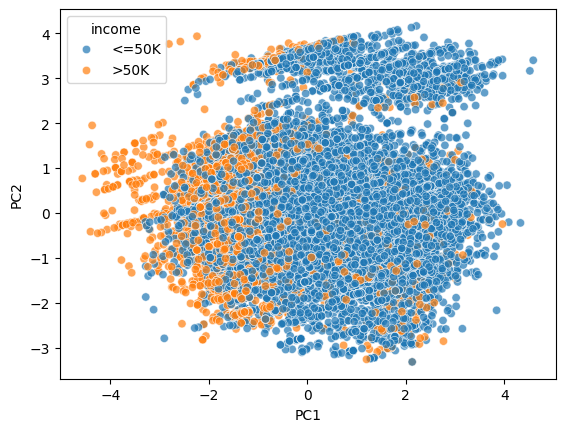

In [56]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame({
    "PC1": pca_result[:, 0],
    "PC2": pca_result[:, 1],
    "income": df["income"]
})
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="income", alpha=0.7)
plt.show()

#### Criando novas Features

O PCA nos mostrou que as features atuais aparentemente são suficientes para nos entregar modelos com bons resultados. O gráfico nos mostra uma clara segmentação dos targets.

No entanto, vamos criar novas Features e verificar se o uso delas trarão alguma melhoria.

Iremos criar as 3 features abaixo:

- <i>capital.result.num</i>: Será o resultado da diferença entre capital.gain e capital.loss, em outras palavras, será o valor liquido de ganho de capital anual.
- <i>education.group.num</i>: Será uma redução na quantidade de níveis de educação de 17 categorias para 3 categorias conforme a seguir:

| Categoria Original                                     | education.num | Novo Grupo       | Novo Grupo Num |
|--------------------------------------------------------|---------------|------------------|----------------|
| Preschool até 12th                                     | 1–8           | ≤ High School    |        1       |
| HS-grad, Some-college, Assoc-voc, Assoc-acdm, Bachelors| 9–13          | Undergraduate    |        2       |
| Masters, Prof-school, Doctorate                        | 14–16         | Postgraduate     |        3       |

- <i>workclass.group.num</i>: Será redução na quantidade de tipos de vínculo empregatício de 9 para 3, conforme a seguir:

| Categoria Original                          | workclass.num | Novo Grupo (workclass_group) | Grupo Nº |
|---------------------------------------------|---------------|------------------------------|----------|
| Federal-gov, Local-gov, State-gov, Private  | 0, 1, 3, 6    | Employed                     | 1        |
| Self-emp-inc, Self-emp-not-inc              | 4, 5          | Self-employed                | 2        |
| Never-worked, Without-pay, other            | 2, 7, 8       | Not Working/Other            | 3        |



In [46]:
df['capital.result'] = df['capital.gain'] - df['capital.loss']

# Instanciar o scaler
scaler = StandardScaler()

# Aplicar o scaler e criar novas colunas com sufixo ".num"
df['capital.result.num'] = scaler.fit_transform(df[['capital.result']])

In [47]:


def simplifica_num_escolaridade(x):
    # Grupo 1: até ensino médio incompleto
    if x in ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad']:
        return 1
    # Grupo 2: graduação incompleta ou completa
    elif x in ['Some-college','Assoc-voc','Assoc-acdm','Bachelors']:
        return 2
    # Grupo 3: pós-graduação
    else:  # Masters, Prof-school, Doctorate
        return 3

df['education.group.num'] = df['education'].apply(simplifica_num_escolaridade)


def simplifica_num_vinculo_empregaticio(x):
    # Grupo 1: empregados (governo ou setor privado)
    if x in ['Federal-gov','Local-gov','State-gov','Private']:
        return 1
    # Grupo 2: autônomos
    elif x in ['Self-emp-inc','Self-emp-not-inc']:
        return 2
    # Grupo 3: não empregados ou outros
    else:  # Never-worked, Without-pay, other
        return 3

df['workclass.group.num'] = df['workclass'].apply(simplifica_num_vinculo_empregaticio)

In [57]:
# Selecionar colunas numéricas
colunas_numericas = ['education.group.num', 'workclass.group.num', 'marital.status.num', 'occupation.num', 'relationship.num', 'race.num', 'sex.num', 'native.country.num', 'capital.result.num', 'hours.per.week']
df_num = df[colunas_numericas]
df_num

,education.group.num,workclass.group.num,marital.status.num,occupation.num,relationship.num,race.num,sex.num,native.country.num,capital.result.num,hours.per.week
0,1,3,6,14,1,4,0,38,-0.721614,40
1,1,1,6,3,1,4,0,38,-0.721614,18
2,2,3,6,14,4,2,0,38,-0.721614,40
3,1,1,0,6,4,4,0,38,-0.660066,40
4,2,1,5,9,3,4,0,38,-0.660066,40
...,...,...,...,...,...,...,...,...,...,...
32556,2,1,4,10,1,4,1,38,-0.133670,40
32557,2,1,2,12,5,4,0,38,-0.133670,38
32558,1,1,2,6,0,4,1,38,-0.133670,40
32559,1,1,6,0,4,4,0,38,-0.133670,40


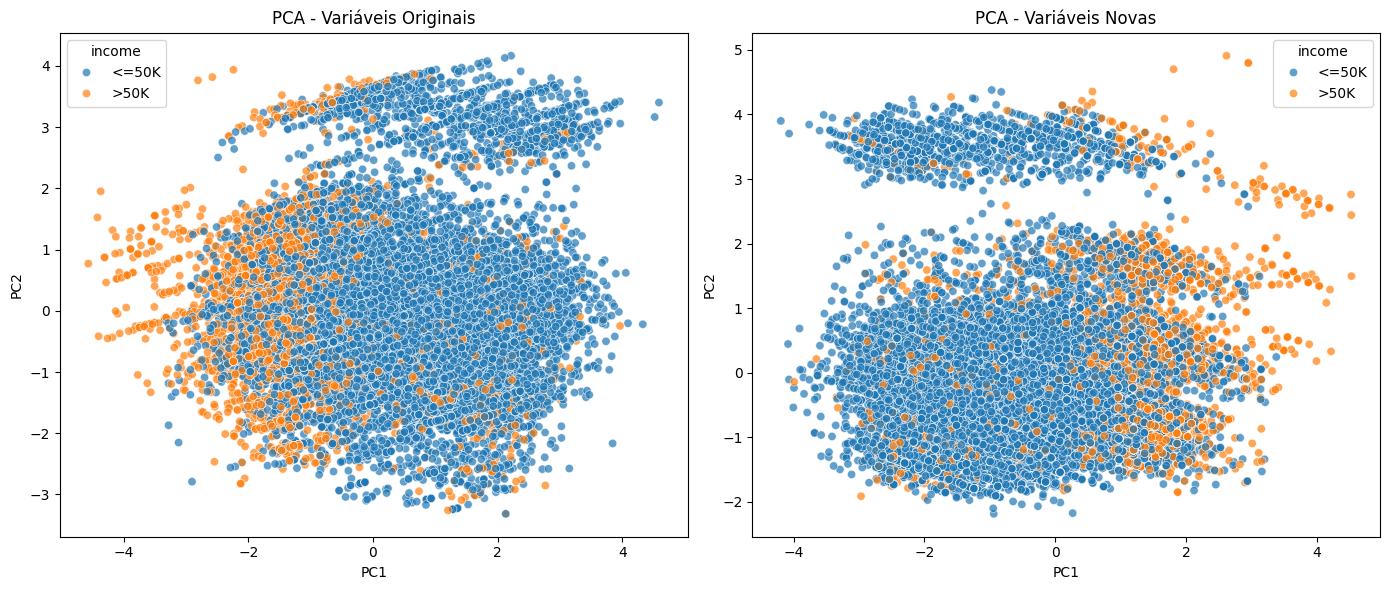

In [58]:

# --- PCA com variáveis originais ---
colunas_numericas_original = [
    'education.num', 'workclass.num', 'marital.status.num', 'occupation.num',
    'relationship.num', 'race.num', 'sex.num', 'native.country.num',
    'capital.gain.num', 'capital.loss.num', 'hours.per.week'
]

df_num_original = df[colunas_numericas_original]

scaler_original = StandardScaler()
scaled_data_original = scaler_original.fit_transform(df_num_original)

pca_original = PCA(n_components=2)
pca_result_original = pca_original.fit_transform(scaled_data_original)

df_pca_original = pd.DataFrame({
    "PC1": pca_result_original[:, 0],
    "PC2": pca_result_original[:, 1],
    "income": df["income"]
})

# --- PCA com variáveis novas ---
scaler_new = StandardScaler()
scaled_data_new = scaler_new.fit_transform(df_num)  # df_num = seu dataframe com variáveis novas

pca_new = PCA(n_components=2)
pca_result_new = pca_new.fit_transform(scaled_data_new)

df_pca_new = pd.DataFrame({
    "PC1": pca_result_new[:, 0],
    "PC2": pca_result_new[:, 1],
    "income": df["income"]
})

# --- Plotar lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_pca_original, x="PC1", y="PC2", hue="income", alpha=0.7, ax=axes[0])
axes[0].set_title("PCA - Variáveis Originais")

sns.scatterplot(data=df_pca_new, x="PC1", y="PC2", hue="income", alpha=0.7, ax=axes[1])
axes[1].set_title("PCA - Variáveis Novas")

plt.tight_layout()
plt.show()